<a href="https://colab.research.google.com/github/KritikMahesh/PRODIGY_GA_03/blob/main/Text_Generation_with_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Text Generation with Markov Chains

**Platform:** Python (Google Colab / Kaggle / Jupyter)  
**Libraries:** `markovify`, `matplotlib`, `wordcloud`, `requests`, `collections`, `re`

---

## 🎯 Objective  
This notebook builds a **text generation model** using **Markov chains**.  
It learns patterns from any given text corpus and generates new sentences and paragraphs that mimic the style of the original text.  
We also create **visualizations** such as bar charts and word clouds to explore the dataset.

---

## 📦 Features  
- Load sample text from a given URL or use **your own `.txt` file**  
- Train **word-level** and **character-level** Markov models  
- Visualize text data with:  
  - Top 20 most frequent words (bar chart)  
  - Word cloud  

---

## 🚀 Steps in This Notebook  
1. **Load Dataset** – Use default text or upload your own  
2. **Train Word-level Markov Model** – Generate coherent text  
3. **Train Character-level Markov Model** – Generate quirky, creative text  
4. **Visualize Word Frequencies** – Bar chart + word cloud  



---

## 💻 Interactive Text Generation Demo

- To bring this all together, I use **Gradio** to create a simple and interactive web interface for our Markov chain generator.  
This demo allows you to paste your own text, select between **word-level** or **character-level** models, adjust the Markov state size, and generate multiple sentences on the fly.

- Below is the complete code that installs necessary libraries, defines the character-level Markov model class, and launches the Gradio app.  
Run this cell to start generating text interactively right in your browser

---

*Let’s get started by loading our dataset and building the Markov chain text generator below* ⬇

In [6]:
# Install markovify library for Markov chain text generation
!pip install markovify
# Import necessary libraries
import markovify

## Load Sample Text

In [12]:
import requests

# Download full text from Project Gutenberg (Alice's Adventures in Wonderland)
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
sample_text = response.text

print(f"Loaded text length: {len(sample_text)} characters")
print(f"Approx. {len(sample_text.split())} words")


# OPTIONAL: Upload your own text file
try:
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    with open(file_name, 'r', encoding='utf-8') as f:
        sample_text = f.read()
except:
    print("File upload not available in this environment. Using sample text.")


Loaded text length: 144696 characters
Approx. 26543 words


File upload not available in this environment. Using sample text.


## Build the Markov Model

In [13]:
# state_size=2 means the model looks at 2 words at a time to predict the next word
word_model = markovify.Text(sample_text, state_size=2)

print("✅ Markov model built successfully!")


✅ Markov model built successfully!


## Generate Sentences using Word-level Model

In [15]:
print("Generated Sentences:\n")
for i in range(5):
    sentence = None
    # Keep trying until a sentence is generated
    while sentence is None:
        sentence = word_model.make_sentence()
    print(f"{i+1}. {sentence}")

print("\nGenerated Paragraph:\n")
paragraph_sentences = []
for _ in range(5):
    sentence = None
    while sentence is None:
        sentence = word_model.make_sentence()
    paragraph_sentences.append(sentence)

paragraph = " ".join(paragraph_sentences)
print(paragraph)


Generated Sentences:

1. Alice went on planning to herself that perhaps it was talking in a Little Bill CHAPTER V. Advice from a Caterpillar The Caterpillar and Alice guessed in a tone of great curiosity.
2. I wonder if I’ve been changed for any of them.
3. This time there were _two_ little shrieks, and more sounds of broken glass, from which she found herself lying on the ground near the door opened inwards, and Alice’s elbow was pressed so closely against her foot, that there ought!
4. However, on the Duchess’s cook.
5. CHAPTER V. Advice from a Caterpillar The Caterpillar was the White Rabbit put on one knee.

Generated Paragraph:

And Alice was not an encouraging opening for a minute or two the Caterpillar took the least notice of her voice, and see what was going to give the hedgehog had unrolled itself, and was beating her violently with its mouth open, gazing up into the air, mixed up with the Duchess, it had entirely disappeared; so the King had said that day. The Gryphon sat up

## Character-level Markov chain text generation

In [16]:
# Custom class to handle characters instead of words
class CharacterText(markovify.Text):
    def word_split(self, sentence):
        return list(sentence)  # Split into characters

    def word_join(self, words):
        return "".join(words)  # Join characters back

# Create character-level model
char_model = CharacterText(sample_text, state_size=4)

print("Generated Sentences (Character-level Model):\n")
for i in range(5):
    sentence = None
    while sentence is None:
        sentence = char_model.make_sentence()
    print(f"{i+1}. {sentence}")


Generated Sentences (Character-level Model):

1. She housand she she was she half the dries were went was peering see when I use look the fille
 CHAPTER III.
2. The Cheshire Cat she house, you, won’t curled an end on just theirs, a long they were with a baby growled and walked underful dreadfull else their_ eyes, and picked very
deeply.
3. And she was going out what she sat she
wanted to Alice what it was delay
would brown look!
4. There get
that she her a fast was every and their side, and, as too large right to do,
and walked all spoke from English.
5. CHAPTER X.     *           The Hattered head on with the one who was if shut her was quite Rabbit-horself a hurt any out in the pig, and up into a tea and
yet—and shore.


#Graphs

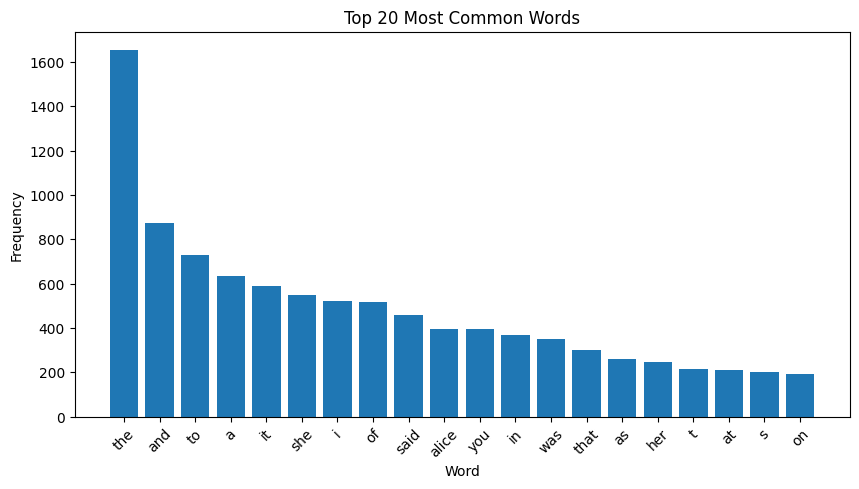

In [17]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Tokenize words
words = re.findall(r'\w+', sample_text.lower())
word_counts = Counter(words)

# Top 20 most common words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


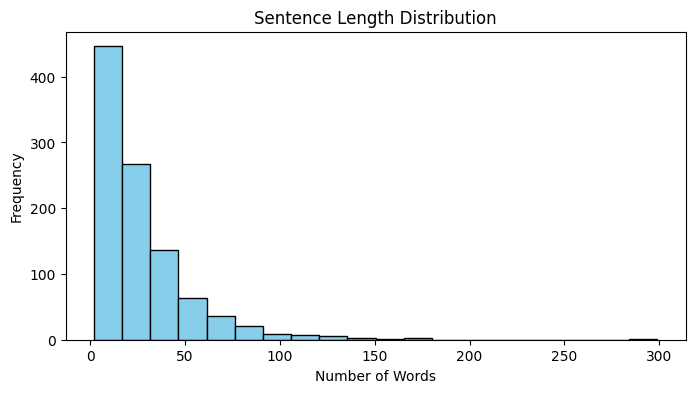

In [18]:
sentences = sample_text.split(".")
lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]

plt.figure(figsize=(8,4))
plt.hist(lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


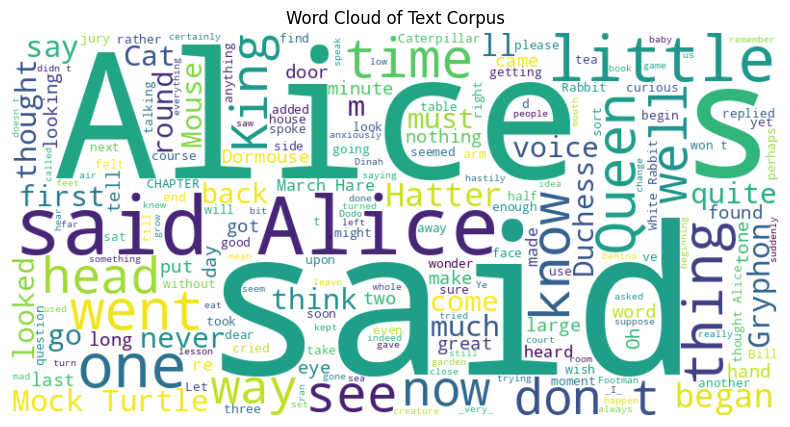

In [24]:
!pip install wordcloud

from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Corpus")
plt.show()


# Markov Chain Text Generator with Gradio and Markovify

This project implements a Markov chain-based text generator that supports both word-level and character-level models.  
It uses **Markovify** for modeling and **Gradio** to create an interactive web interface for generating sentences based on user-provided input text.


In [27]:
!pip install gradio markovify

import gradio as gr
import markovify

# Character-level Markovify class
class CharacterText(markovify.Text):
    def word_split(self, sentence):
        return list(sentence)
    def word_join(self, words):
        return "".join(words)

def generate_text(input_text, model_type, state_size, num_sentences):
    if not input_text.strip():
        return "⚠️ Please enter some text."

    if model_type == "Word-level":
        model = markovify.Text(input_text, state_size=state_size)
    else:
        model = CharacterText(input_text, state_size=state_size)

    sentences = []
    for _ in range(num_sentences):
        s = None
        while s is None:
            s = model.make_sentence()
        sentences.append(s)

    return "\n".join(sentences)

# Gradio UI
demo = gr.Interface(
    fn=generate_text,
    inputs=[
        gr.Textbox(label="Input Text", lines=8, placeholder="Paste your training text here..."),
        gr.Radio(["Word-level", "Character-level"], label="Model Type", value="Word-level"),
        gr.Slider(1, 5, value=2, step=1, label="State Size"),
        gr.Slider(1, 10, value=5, step=1, label="Number of Sentences")
    ],
    outputs="text",
    title="📜 Markov Chain Text Generator",
    description="Generate sentences from your own text using Markov chains."
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0d743ded31fae96f99.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


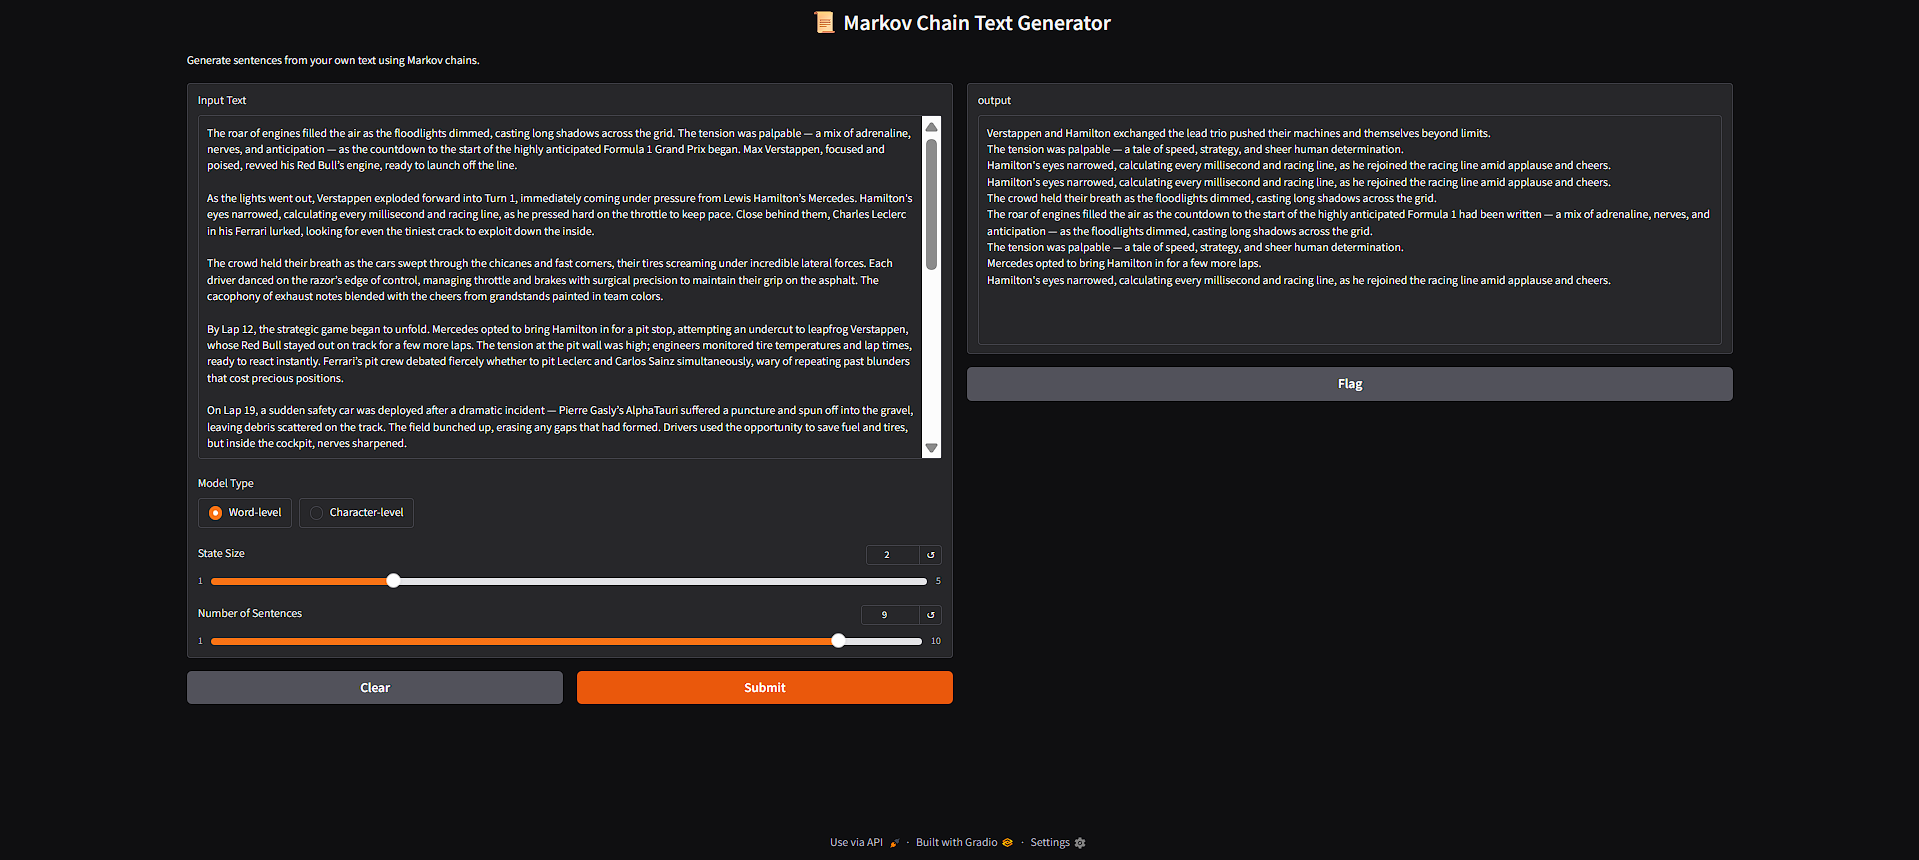

##END
## ^ . ^ /